# Week2授業課題２

In [4]:
import numpy as np

csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [10]:
print(fuji[:])
fuji.shape

#左から順番に「その地点の番号」「緯度」「経度」「標高」「地点0からの距離」となっています。
#標高と距離の単位はメートルです。300地点のデータです。

[[    0.          35.134141   139.132082     0.           0.      ]
 [    1.          35.135826   139.129202     0.         322.      ]
 [    2.          35.13751    139.126322     0.         644.      ]
 ...
 [  297.          35.631284   138.271368  1973.99     95698.      ]
 [  298.          35.632947   138.268452  1841.36     96020.      ]
 [  299.          35.63461    138.265536  1725.8      96343.      ]]


(300, 5)

【問題1】データの可視化 Matplotlibを使い標高データを可視化してください。横軸に「その地点の番号」、縦軸に「標高」を設定すれば、富士山の断面図が描けます。

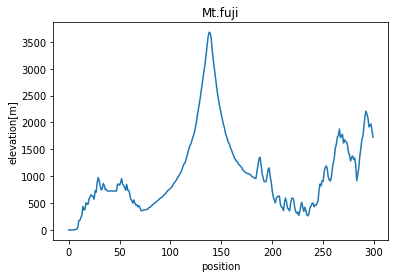

In [19]:
import matplotlib.pyplot as plt

plt.plot(fuji[: , 0] , fuji[: , 3])
plt.title("Mt.fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.show()

【問題2】ある地点の勾配を計算する関数を作成

In [21]:
def compute_grad(n):
    dn = fuji[n , 0] - fuji[n - 1 , 0]
    dele = fuji[n , 3] - fuji[n - 1 , 3]
    return dele / dn

In [24]:
compute_grad(136)

168.35000000000036

【問題3】移動先の地点を計算する関数を作成

In [25]:
def move(n , alpha = 0.2):
    return n - alpha * compute_grad(n)

In [30]:
move(100)

96.21999999999998

【問題4】山を下る関数を作成

In [69]:
import math

def descending(n = 136 , alpha = 0.2):
    position_n = n
    positions = [position_n]
    for _ in range(100000):
        position_n = int(math.floor(move(position_n , alpha)))
        if position_n <= 0:
            position_n == 0
            positions.append(position_n)
            return positions
        elif position_n >= 299:
            position_n == 299
            positions.append(position_n)
            return positions
        
        if len(positions) >= 50:
            if(position_n <= positions[-49] + 1) or (position_n >= positions[-49]-1):
                positions.append(position_n)
            return positions
        
        positions.append(position_n)
    return positions

In [70]:
des = descending()

In [71]:
print(des)

[136, 102, 97, 91, 88, 84, 80, 79, 73, 70, 78, 77, 75, 74, 73, 70, 78, 77, 75, 74, 73, 70, 78, 77, 75, 74, 73, 70, 78, 77, 75, 74, 73, 70, 78, 77, 75, 74, 73, 70, 78, 77, 75, 74, 73, 70, 78, 77, 75, 74, 73]


【問題5】下山過程の可視化

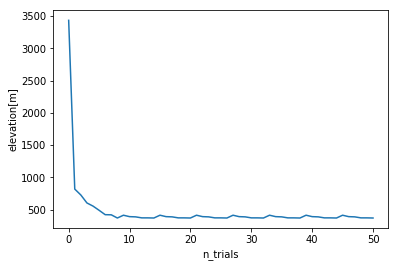

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(np.arange(len(des)) , fuji[des , 3])
plt.xlabel("n_trials")
plt.ylabel("elevation[m]")
plt.show()

【問題6】初期値の変更

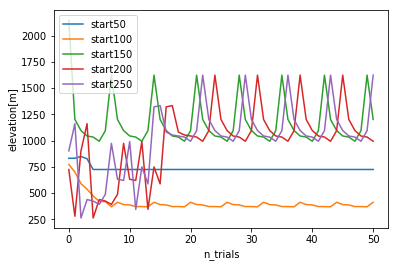

In [73]:
for i in [50,100,150,200,250]:
    des = descending(n = i)
    plt.plot(np.arange(len(des)) , fuji[des , 3] ,label = "start{}".format(i))

plt.xlabel("n_trials")
plt.ylabel("elevation[m]")
plt.legend()
plt.show()

In [74]:
fuji[[50,100,150,200,250] , 3]

array([ 831.  ,  772.58, 2146.01,  723.66,  901.57])

問題7】（アドバンス問題）ハイパーパラメータの変更

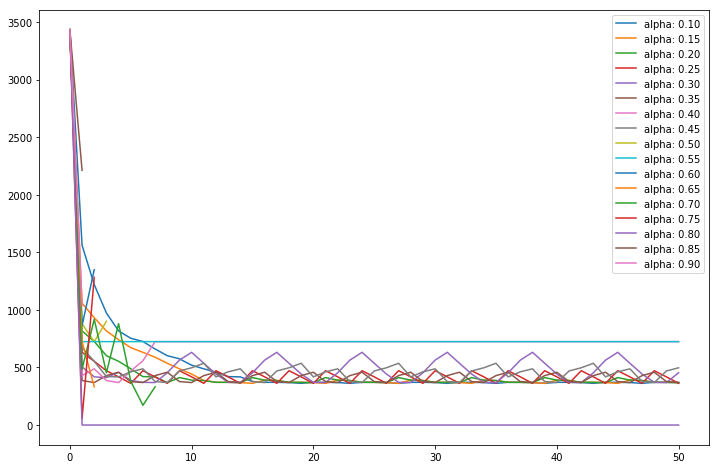

In [79]:
alphas = np.arange(0.1 , 0.9 + 0.01 , 0.05)
plt.subplots(figsize = (12,8))
for i in alphas:
    des = descending(alpha = i)
    plt.plot(np.arange(len(des)) , fuji[des ,3] , label = "alpha: {:.2f}".format(i))
    
plt.legend()
plt.show()

In [80]:
alphas

array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 ])